In [1]:
import pandas as pd
import numpy as np

#Importacion arboles
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier

#Importacion preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Importacion metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

#Librerias para visualizacion
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
def getData():
  return pd.read_csv("https://docs.google.com/spreadsheets/d/1-DWTP8uwVS-dZY402-dm0F9ICw_6PNqDGLmH0u8Eqa0/export?format=csv&gid=2054774482")

In [3]:
df = getData()
df.head()

,anios_estudiados,barrio,categoria_de_trabajo,edad,educacion_alcanzada,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,tiene_alto_valor_adquisitivo,trabajo
0,17,Palermo,empleado_provincial,39,universidad_3_anio,sin_matrimonio,2174,hombre,40,cristianismo,sin_familia,0,entretenimiento
1,17,Palermo,monotibutista,50,universidad_3_anio,matrimonio_civil,0,hombre,13,cristianismo,casado,0,directivo_gerente
2,13,Palermo,relacion_de_dependencia,38,4_anio,divorciado,0,hombre,40,cristianismo,sin_familia,0,limpiador
3,11,Palermo,relacion_de_dependencia,53,2_anio,matrimonio_civil,0,hombre,40,judaismo,casado,0,limpiador
4,17,Balvanera,relacion_de_dependencia,28,universidad_3_anio,matrimonio_civil,0,mujer,40,judaismo,casada,0,profesional_especializado


In [4]:
# df_edit = pd.DataFrame()
# df_edit = df.drop(columns = ["edad", "horas_trabajo_registradas", "barrio"])
# df_edit["opera_en_bolsa"] = df_edit["ganancia_perdida_declarada_bolsa_argentina"].apply(lambda x: 1 if x != 0 else 0)
# df_edit["es_hombre"] = df_edit["genero"].apply(lambda x: 1 if x == "hombre" else 0)
# df_edit.rol_familiar_registrado.replace(to_replace=["casada"],  value=["casado"], inplace=True)

# df_edit.drop(columns = ["genero", "ganancia_perdida_declarada_bolsa_argentina", "anios_estudiados"], inplace=True)

# df_edit.head()

In [5]:
# df_edit = pd.DataFrame()
# df_edit = df.copy()
# df_edit["opera_en_bolsa"] = df_edit["ganancia_perdida_declarada_bolsa_argentina"].apply(lambda x: 1 if x != 0 else 0)
# df_edit["edad_10_y_20"] = df_edit["edad"].apply(lambda x: 1 if x > 10 and x <= 20 else 0)
# df_edit["edad_21_y_30"] = df_edit["edad"].apply(lambda x: 1 if x > 20 and x <= 30 else 0)
# df_edit["edad_31_y_40"] = df_edit["edad"].apply(lambda x: 1 if x > 30 and x <= 40 else 0)
# df_edit["edad_41_y_50"] = df_edit["edad"].apply(lambda x: 1 if x > 40 and x <= 50 else 0)
# df_edit["edad_51_y_60"] = df_edit["edad"].apply(lambda x: 1 if x > 50 and x <= 60 else 0)
# df_edit["edad_61_y_70"] = df_edit["edad"].apply(lambda x: 1 if x > 60 and x <= 70 else 0)
# df_edit["edad_71_y_80"] = df_edit["edad"].apply(lambda x: 1 if x > 70 and x <= 80 else 0)
# df_edit["edad_81_y_90"] = df_edit["edad"].apply(lambda x: 1 if x > 80 and x <= 90 else 0)
# df_edit["es_hombre"] = df_edit["genero"].apply(lambda x: 1 if x == "hombre" else 0)
# df_edit.rol_familiar_registrado.replace(to_replace=["casada"],  value=["casado"], inplace=True)

# df_edit.drop(columns = ["horas_trabajo_registradas", "barrio", "genero", "ganancia_perdida_declarada_bolsa_argentina", "anios_estudiados"], inplace=True)

# df_edit.head()

In [7]:
def set_value_row_casado_trabajo(row):
    if (row.rol_familiar_registrado == "casado" and (row.trabajo == "profesional_especializado" or row.trabajo == "directivo_gerente" )):
      return 1                 
    else:
      return 0
      
def feature_engineering(df):
    "Hace las transformaciones de datos necesarias."
    df["opera_en_bolsa"] = df["ganancia_perdida_declarada_bolsa_argentina"].apply(lambda x: 1 if x != 0 else 0)
    df["es_hombre"] = df["genero"].apply(lambda x: 1 if x == "hombre" else 0)
    df.rol_familiar_registrado.replace(to_replace=["casada"],  value=["casado"], inplace=True)
    df["casado_trabajo"] = df.apply(lambda row: set_value_row_casado_trabajo(row), axis= 1)

    df.drop(columns = ["edad", "horas_trabajo_registradas", "barrio", "genero", "ganancia_perdida_declarada_bolsa_argentina", "anios_estudiados"], inplace=True)

    df = pd.get_dummies(df, drop_first=True, columns=["categoria_de_trabajo", "educacion_alcanzada", "estado_marital", "religion", "rol_familiar_registrado", "trabajo"])

    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df.tiene_alto_valor_adquisitivo)

    X = df.drop(columns=['tiene_alto_valor_adquisitivo'])
    y = label_encoder.transform(df.tiene_alto_valor_adquisitivo)

    return X, y, df, label_encoder

In [8]:
df_edit = pd.DataFrame()
df_edit = df.copy()

X, y, df_new, y_encoder = feature_engineering(df_edit)
df_new.head()

,tiene_alto_valor_adquisitivo,opera_en_bolsa,es_hombre,casado_trabajo,categoria_de_trabajo_empleado_municipal,categoria_de_trabajo_empleado_provincial,categoria_de_trabajo_monotibutista,categoria_de_trabajo_relacion_de_dependencia,categoria_de_trabajo_responsable_inscripto,categoria_de_trabajo_sin_trabajo,categoria_de_trabajo_trabajo_voluntariado,educacion_alcanzada_1_anio,educacion_alcanzada_2_anio,educacion_alcanzada_3_anio,educacion_alcanzada_4_anio,educacion_alcanzada_5-6_grado,educacion_alcanzada_5_anio,educacion_alcanzada_7-8_grado,educacion_alcanzada_9_grado,educacion_alcanzada_preescolar,educacion_alcanzada_universiada_5_anio,educacion_alcanzada_universiada_6_anio,educacion_alcanzada_universidad_1_anio,educacion_alcanzada_universidad_2_anio,educacion_alcanzada_universidad_3_anio,educacion_alcanzada_universidad_4_anio,estado_marital_matrimonio_civil,estado_marital_matrimonio_militar,estado_marital_pareja_no_presente,estado_marital_separado,estado_marital_sin_matrimonio,estado_marital_viudo_a,religion_budismo,religion_cristianismo,religion_judaismo,religion_otro,rol_familiar_registrado_con_hijos,rol_familiar_registrado_otro,rol_familiar_registrado_sin_familia,rol_familiar_registrado_soltero_a,trabajo_ejercito,trabajo_entretenimiento,trabajo_inspector,trabajo_limpiador,trabajo_otros,trabajo_profesional_especializado,trabajo_reparador,trabajo_sector_primario,trabajo_seguridad,trabajo_servicio_domestico,trabajo_soporte_tecnico,trabajo_transporte,trabajo_ventas
0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [9]:
print("Cantidad de features en el nuevo set")
print(len(df_new.columns))

Cantidad de features en el nuevo set
53


In [10]:
# Obtengo los sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [11]:
# n_estimators es el numero de arboles
classifier=RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)

# Entrenar
classifier.fit(X_train, y_train)

# Predecir
predictions=classifier.predict(X_test)

In [12]:
# Obtener metricas de error
print("Matriz de confusion")
print(confusion_matrix(y_test, predictions))
print("\n")

print("Porcentaje de aciertos")
print(round(accuracy_score(y_test, predictions),3))
print("\n")

print("Precision")
print(round(precision_score(y_test, predictions),3))
print("\n")

print("Recall")
print(round(recall_score(y_test, predictions),3))
print("\n")

print("F1 Score")
print(round(f1_score(y_test, predictions),3))

Matriz de confusion
[[4763  153]
 [ 990  607]]


Porcentaje de aciertos
0.825


Precision
0.799


Recall
0.38


F1 Score
0.515


In [13]:
def plot_roc(_fpr, _tpr, x):
    roc_auc = auc(_fpr, _tpr)

    plt.figure(figsize=(15, 10))
    plt.plot(_fpr, _tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.scatter(_fpr, x)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

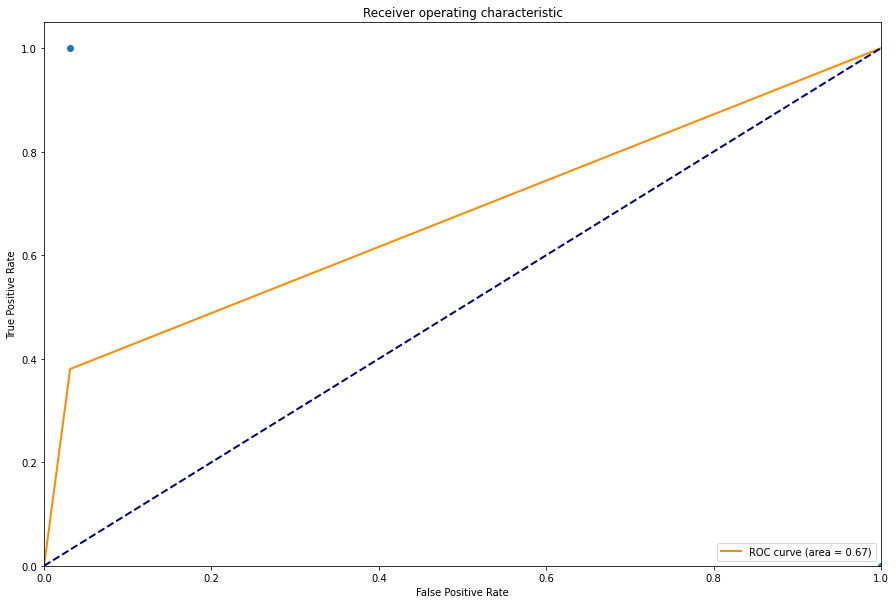

0.6744824001267632

In [14]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plot_roc(fpr, tpr, thresholds)
display(roc_auc_score(y_test, predictions))

[1.06898813e-01 4.12627431e-02 1.38929714e-01 1.30007052e-02
 1.21604124e-02 1.71828678e-02 2.22388803e-02 1.47368807e-02
 6.68381021e-06 3.77708333e-04 5.20292319e-03 6.42838496e-03
 2.89974917e-03 1.84514037e-02 2.95166935e-03 1.41301248e-02
 7.47824661e-03 5.18885623e-03 3.93358792e-04 1.48887606e-02
 1.31150714e-02 7.98806256e-03 6.95037326e-03 3.78376975e-02
 2.80864877e-02 1.59752215e-01 1.07462771e-03 3.24710841e-03
 5.74261805e-03 6.45233597e-02 5.93534118e-03 8.13615031e-03
 1.48054646e-02 9.77322643e-03 2.90368828e-03 2.33837321e-02
 5.64779939e-03 1.93662516e-02 1.25755670e-02 3.55523073e-05
 1.17929134e-02 6.15214074e-03 5.75315794e-03 1.33207916e-02
 3.16174137e-02 9.99416119e-03 7.54720833e-03 6.55347658e-03
 6.06019292e-04 1.05720202e-02 6.48436594e-03 1.39170500e-02]


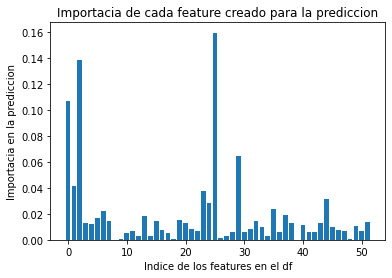

In [15]:
# Ver la importancia de cada feature para este algoritmo
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

print(model.feature_importances_)

# Graficar importancia de cada uno
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.title('Importacia de cada feature creado para la prediccion', )
plt.xlabel('Indice de los features en el df')
plt.ylabel('Importacia en la prediccion')
plt.show()

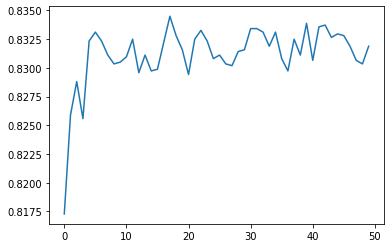

In [16]:
# Ver aporte de cada arbol
trees=range(50)
accuracy=np.zeros(50)

for idx in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators=idx + 1)
    classifier=classifier.fit(X_train, y_train)
    predictions=classifier.predict(X_test)
    accuracy[idx]=accuracy_score(y_test, predictions)

plt.cla()
plt.plot(trees, accuracy)